# Telecom Customer Churn Analysis

1. Domain Exploration
    - understand the business process
    - Identify beleifs, loopholes, losses, data flow in the business flow
    
    
2. Data Collection & data exploration
    - Collecting data from different business verticals, preparing a dataset out of it
    - explore data for common challenges and data quality issues.
    
    
3. Data Cleaning
    - Handling missing values
    - Handling unwanted columns - identifiers
    - Handling duplicate entries
    - Handling outliers
    
    
4. Descriptive & Exploratory Analysis
    - Statistics
    - Data Visualization
    
    
5. Preparing the report

# Data Exploration

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load data
df = pd.read_excel(r"E:\MLIoT\ML\dataset\telecom\telecom_churn_modelling.xlsx")
df.shape

(3333, 20)

In [4]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
len(df['State'].unique())

51

In [6]:
df['Area code'].unique()

array([415, 408, 510], dtype=int64)

Observations - 
    - unwanted columns - State may be an identifier and may not be needed, Area code
    - Customer having no voice mail plan will have the value of number of vmail messages as 0
    - mostly total xxx minutes should be highly correlated to total xxx charge

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [8]:
df['State'].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [9]:
df['International plan'].unique()

array(['No', 'Yes'], dtype=object)

In [10]:
df['Voice mail plan'].unique()

array(['Yes', 'No'], dtype=object)

# Data Cleaning

In [11]:
# check for duplicated rows
df.duplicated().sum()

0

In [12]:
# check for missng values
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [13]:
# Dropping unwanted columns
# - analyse the categorical columns

In [14]:
# check for outliers
df.skew()

Account length            0.096606
Area code                 1.126823
Number vmail messages     1.264824
Total day minutes        -0.029077
Total day calls          -0.111787
Total day charge         -0.029083
Total eve minutes        -0.023877
Total eve calls          -0.055563
Total eve charge         -0.023858
Total night minutes       0.008921
Total night calls         0.032500
Total night charge        0.008886
Total intl minutes       -0.245136
Total intl calls          1.321478
Total intl charge        -0.245287
Customer service calls    1.091359
Churn                     2.018356
dtype: float64

# Descriptive Analysis

In [15]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### State

In [16]:
df['State'].value_counts()

WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
VT     73
ID     73
MI     73
UT     72
TX     72
IN     71
KS     70
MD     70
MT     68
NJ     68
NC     68
WA     66
NV     66
CO     66
MA     65
MS     65
RI     65
AZ     64
MO     63
FL     63
ND     62
ME     62
NM     62
NE     61
OK     61
DE     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
TN     53
HI     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: State, dtype: int64

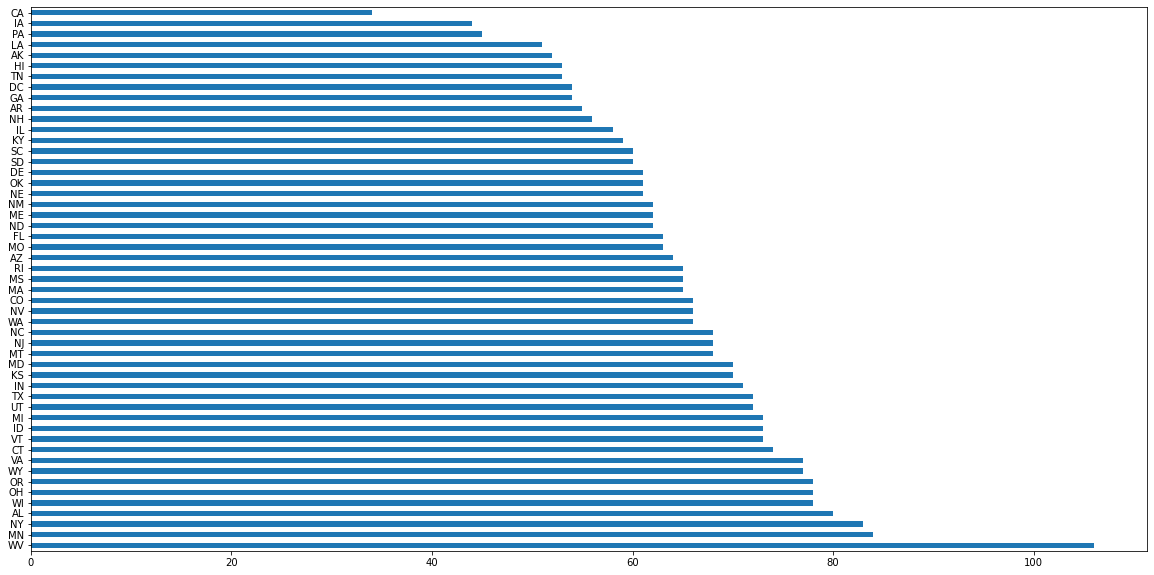

In [19]:
df['State'].value_counts().plot(kind='barh',figsize=(20,10))

Observation - 
    - the number of customers from each state is differently distributed 

In [21]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

415    1655
510     840
408     838
Name: Area code, dtype: int64


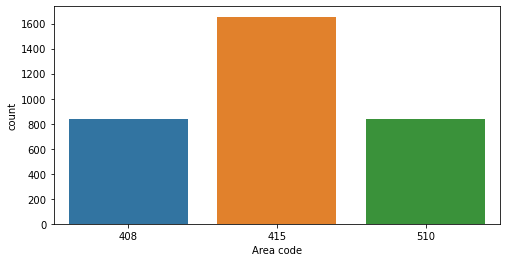

No     3010
Yes     323
Name: International plan, dtype: int64


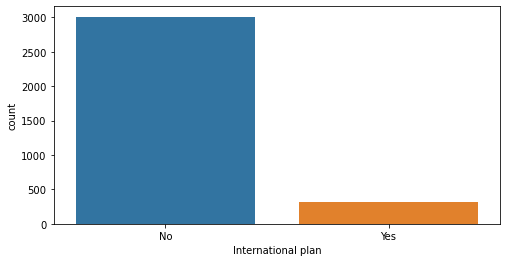

No     2411
Yes     922
Name: Voice mail plan, dtype: int64


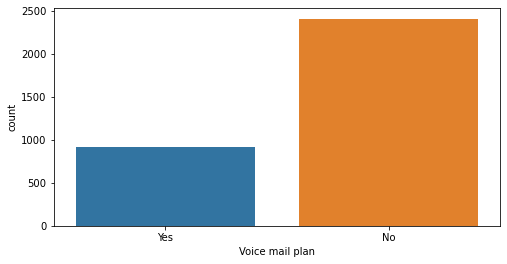

False    2850
True      483
Name: Churn, dtype: int64


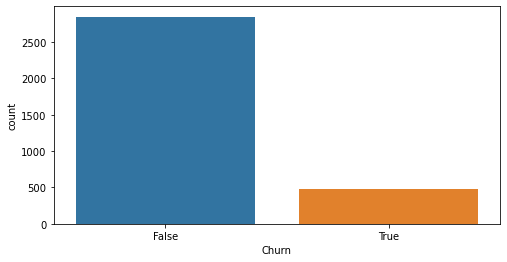

In [22]:
cats = ['Area code', 'International plan','Voice mail plan','Churn']
for col in cats:
    print(df[col].value_counts())
    
    plt.figure(figsize=(8,4))
    sns.countplot(df[col])
    plt.show()

Observations - 
    - Area code - almost half of customers are from area code 415, 1/4 from other two area code each
    - Internation Plan - almost 90% of customers do not have internation plan
    - Voice mail Message - almost 30% of customers have opted for voice mail message
    - Churn - alomst 14% of cusomers left the telecom company

## Numeric variables

In [23]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [24]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

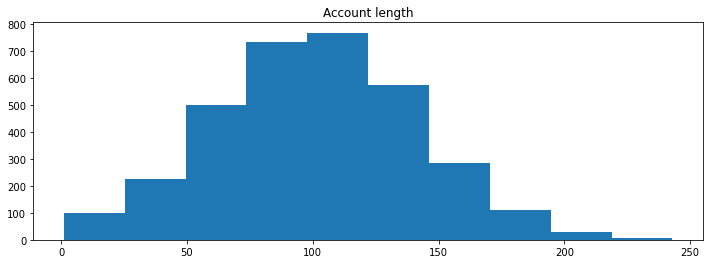

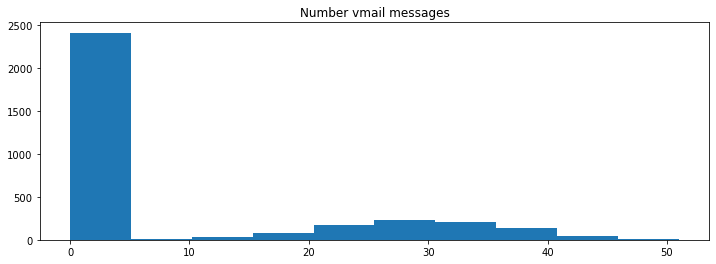

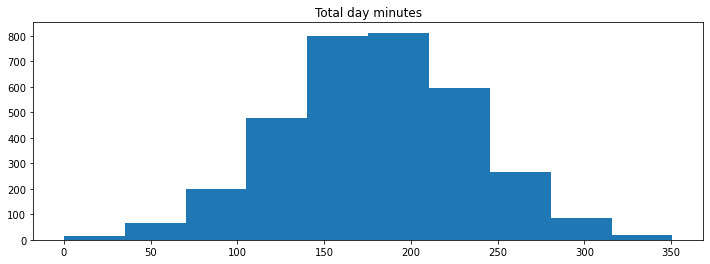

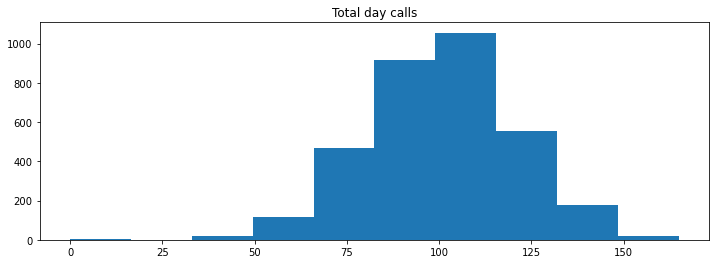

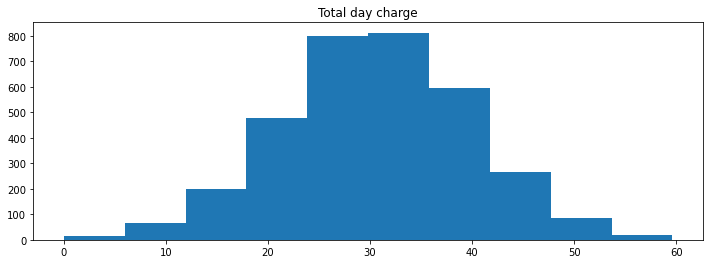

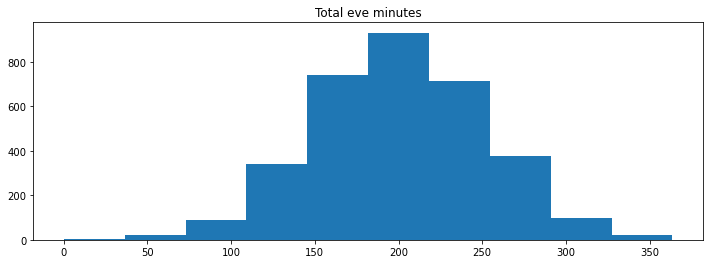

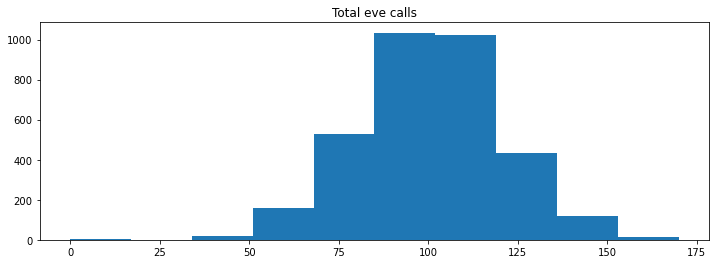

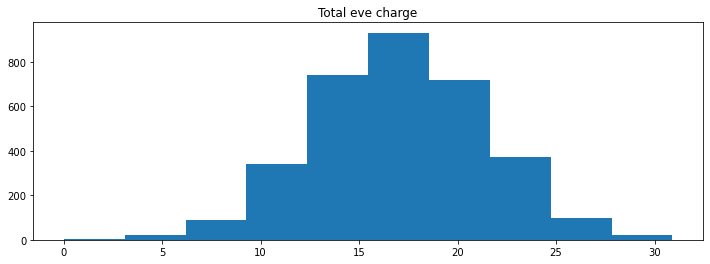

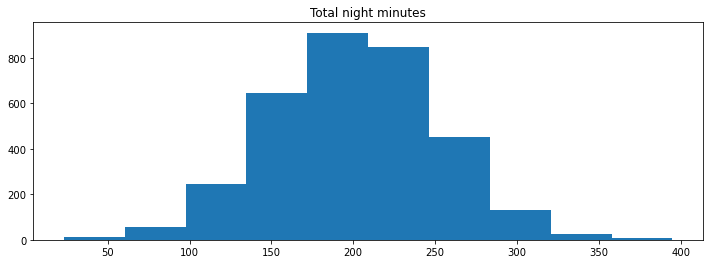

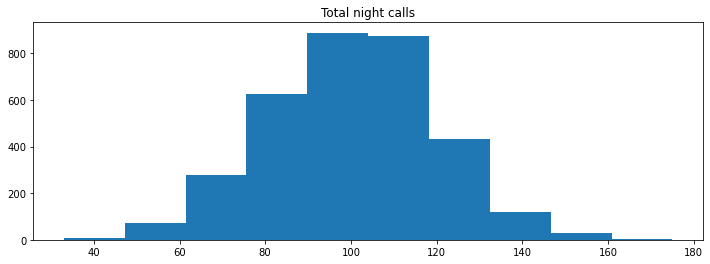

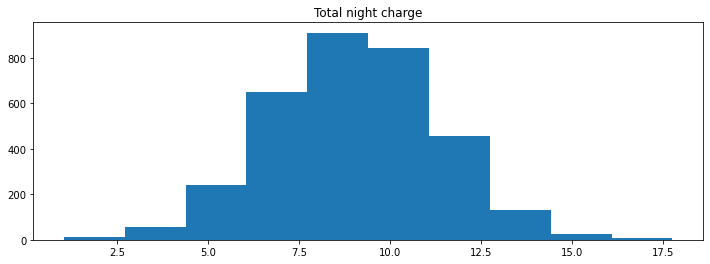

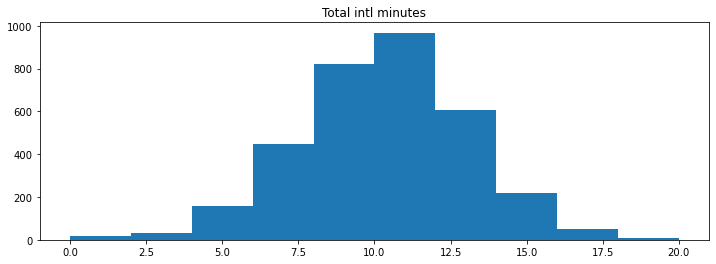

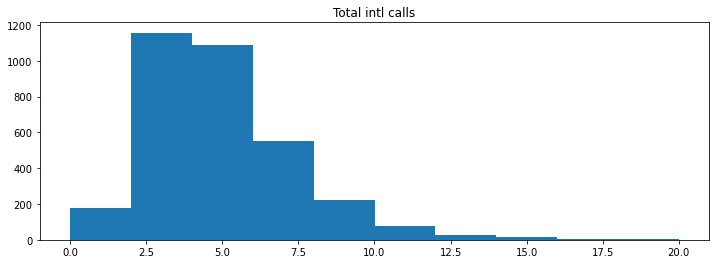

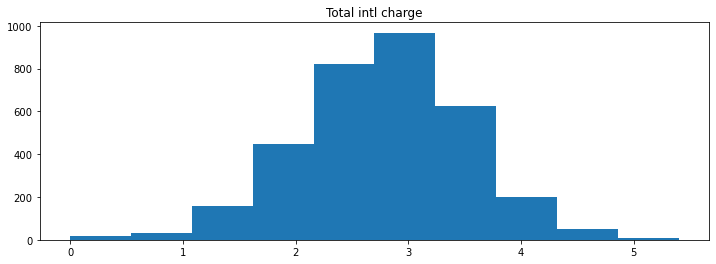

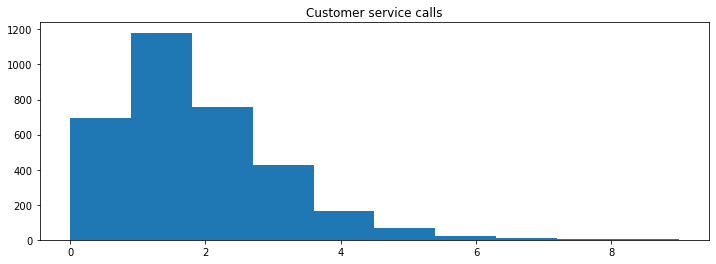

In [28]:
nums = ['Account length', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls']

for col in nums:
    plt.figure(figsize=(12,4))
    plt.hist(df[col])
    plt.title(col)
    plt.show()